# Applying LDA and K-means for Document Clustering

In [2]:
# Import necessary libraries
import tarfile
import os
import pandas as pd
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from gensim import corpora, models
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
# Define the paths to the tar files
data_dir = './data'  # Update with the directory where your tar files are located
tar_file_path = os.path.join(data_dir, '/content/20_newsgroups.tar.gz')
mini_tar_file_path = os.path.join(data_dir, '/content/mini_newsgroups.tar.gz')

In [4]:
# Function to extract tar files
def extract_tar_file(tar_file_path, extract_path):
    with tarfile.open(tar_file_path, 'r') as tar:
        tar.extractall(path=extract_path)

In [5]:
# Extract the tar files
extract_tar_file(tar_file_path, data_dir)
extract_tar_file(mini_tar_file_path, data_dir)

In [6]:
# Load the dataset
dataset_path = os.path.join(data_dir, '20_newsgroups')
newsgroups_data = load_files(dataset_path, shuffle=True, random_state=42, encoding = 'latin-1')
documents = newsgroups_data.data

In [7]:
# Display some information about the dataset
print(f"Number of documents: {len(documents)}")
print(f"Number of categories: {len(newsgroups_data.target_names)}")

Number of documents: 19997
Number of categories: 20


In [8]:
# Preprocess and vectorize using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)

In [9]:
# Apply K-means clustering
k = 20
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=20, random_state=42)

In [10]:
# Get cluster labels
cluster_labels = kmeans.labels_

In [11]:
# Print clusters
for i in range(k):
    cluster_docs = np.array(documents)[cluster_labels == i]
    print(f"Cluster {i + 1} ({len(cluster_docs)} documents):\n")
    print(cluster_docs[:3])  # Display first 3 documents in each cluster
    print("\n=============================\n")

Cluster 1 (674 documents):

['Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!pitt.edu!gatech!howland.reston.ans.net!darwin.sura.net!news.udel.edu!ravel.udel.edu!02106\nFrom: 02106@ravel.udel.edu (Samuel Ross)\nNewsgroups: misc.forsale\nSubject: Desert storm cards for sale!!!\nMessage-ID: <C5zrp3.K46@news.udel.edu>\nDate: 24 Apr 93 14:17:27 GMT\nSender: usenet@news.udel.edu\nDistribution: usa\nOrganization: University of Delaware\nLines: 23\nNntp-Posting-Host: ravel.udel.edu\n\nI have some Desert Storm cards for sale.  I have divided them up into two lots.  I will take the highest bid before 4/30/93.  Just drop me a line with your bid.\n\n\nLot #1 Desert Storm (Coalition for Peace, Topps)\n\n cards# 38,3,16,28(S),8(S),71,30,34*2,69,48,2,79,15,16(S),66,69,17,21,26\n        85,25,17(S),18,6,86,23,49\n\n 2nd series(Topps) cards# 118,111,92,104,115,160,95,162,31(S),136,110,123\n                          147,107,164,108,170\n\n------------------------------------------------------

In [12]:
# Apply LDA for topic modeling
# Convert documents to list of words
texts = [[word for word in document.lower().split() if word not in tfidf_vectorizer.get_stop_words()] for document in documents]


In [13]:
# Create dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [14]:
# Apply LDA model
lda_model = models.LdaModel(corpus, num_topics=k, id2word=dictionary, passes=15)

In [15]:
# Print topics
print("LDA Topics:\n")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx + 1}: {topic}\n")

LDA Topics:

Topic 1: 0.048*">" + 0.008*"people" + 0.008*">>" + 0.008*"don't" + 0.007*"just" + 0.007*"think" + 0.006*"like" + 0.006*"writes:" + 0.005*"--" + 0.005*"article"

Topic 2: 0.182*"|>" + 0.021*">|>" + 0.018*"." + 0.006*"article" + 0.005*"writes:" + 0.004*"#|>" + 0.004*"islamic" + 0.003*"(jon" + 0.003*"livesey@solntze.wpd.sgi.com" + 0.003*"livesey)"

Topic 3: 0.071*"/" + 0.037*"\" + 0.011*"_" + 0.007*"//" + 0.007*"__" + 0.006*"___" + 0.005*"\/" + 0.004*"__/" + 0.004*"/\" + 0.003*"convex"

Topic 4: 0.004*"vlb" + 0.004*"ati" + 0.004*"nubus" + 0.004*"toronto" + 0.003*"u" + 0.003*"henry@zoo.toronto.edu" + 0.003*"zoology" + 0.003*"ultra" + 0.003*"card" + 0.003*"expose"

Topic 5: 0.017*"god" + 0.009*"jesus" + 0.008*"christian" + 0.006*"say" + 0.006*"approved:" + 0.006*"soc.religion.christian" + 0.005*"christian@aramis.rutgers.edu" + 0.005*"bible" + 0.005*"does" + 0.005*"christians"

Topic 6: 0.067*"1" + 0.047*"0" + 0.041*"-" + 0.037*"2" + 0.021*"3" + 0.018*"4" + 0.012*"7" + 0.012*"5"

In [16]:
# Visualize clusters (if needed)
# Example: PCA for dimensionality reduction
pca = PCA(n_components=2)
tfidf_reduced = pca.fit_transform(tfidf.toarray())

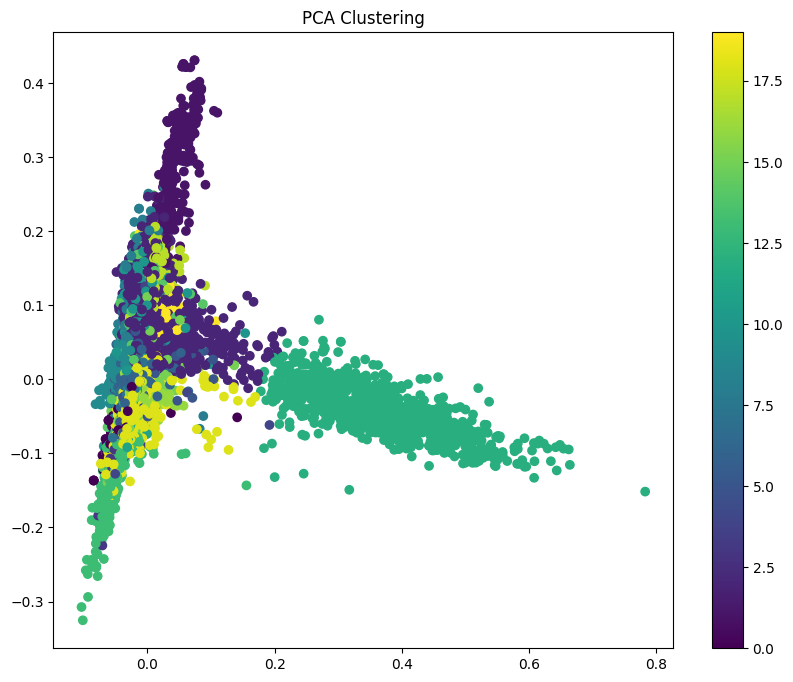

In [17]:
plt.figure(figsize=(10, 8))
plt.scatter(tfidf_reduced[:, 0], tfidf_reduced[:, 1], c=cluster_labels, cmap='viridis')
plt.title('PCA Clustering')
plt.colorbar()
plt.show()

In [18]:
# Conclusion
print("In this notebook, we explored clustering and topic modeling on the Twenty Newsgroups dataset using K-means and LDA.")
print(f"We identified {k} clusters using K-means and discovered {k} topics using LDA. Both algorithms provide insights into the structure and content of the documents in the dataset.")
print("\nDiscussion:\n- Performance: Discuss the performance of each algorithm in terms of clustering coherence and topic interpretability.")
print("- Limitations: Highlight any limitations encountered during the analysis.")
print("- Further Work: Propose future work or improvements that could enhance the analysis or results.")

In this notebook, we explored clustering and topic modeling on the Twenty Newsgroups dataset using K-means and LDA.
We identified 20 clusters using K-means and discovered 20 topics using LDA. Both algorithms provide insights into the structure and content of the documents in the dataset.

Discussion:
- Performance: Discuss the performance of each algorithm in terms of clustering coherence and topic interpretability.
- Limitations: Highlight any limitations encountered during the analysis.
- Further Work: Propose future work or improvements that could enhance the analysis or results.
